In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
sns.set_context('notebook')
sns.set_style('dark')

### Modeling

In [2]:

data = {
    "Age": ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-120"],
    "Number": [193631, 547023, 674798, 806952, 984094, 1012979, 732165, 305157, 60637],
    "%": [3.6, 10.3, 12.7, 15.2, 18.5, 19.1, 13.8, 5.7, 1.1],
    "mean SBP": [115.05, 121.27, 123.79, 127.32, 129.98, 132.42, 134.62, 136.89, 138.11],
    "std SBP": [13.65, 14.19, 15.91, 16.93, 17.19, 17.13, 17.36, 18.35, 19.59],
    "mean DBP": [69.8, 74.27, 77.31, 79.36, 79.05, 76.71, 74.06, 71.56, 69.86],
    "std DBP": [8.9, 9.6, 10.48, 10.46, 9.88, 9.38, 9.11, 9.22, 9.44],
    "ρ (SBP, DBP)": [0.61, 0.66, 0.74, 0.73, 0.67, 0.58, 0.52, 0.49, 0.5]
}

df = pd.DataFrame(data)


In [3]:
def get_mean_age(x):
    l, h = x.split('-')
    val = np.mean(range(int(l), int(h)))
    return val

In [4]:
df['Age'] = df.Age.apply(get_mean_age)
model_df = pd.concat([df[['Age']], df[['Age']]**2], axis=1)
model_df.columns = ['Age', 'Age_squared']

In [5]:
lr1 = LinearRegression()
lr1.fit(model_df, df['mean SBP'])
b1 = lr1.coef_[0]
b2 = lr1.coef_[1]
print(f'fitted curve is for SBP prediction is age*{np.round(b1, 3)} age^2*{np.round(b2, 3)} + {np.round(lr1.intercept_, 3)}')

fitted curve is for SBP prediction is age*0.45 age^2*-0.002 + 111.092


In [6]:
lr = LinearRegression()
lr.fit(model_df, df[['mean DBP']])
b1 = lr.coef_[0][0]
b2 = lr.coef_[0][1]

In [7]:
print(f'fitted curve is for DBP prediction is age*{np.round(b1, 3)} age^2*{np.round(b2, 3)} + {np.round(lr.intercept_[0], 3)}')

fitted curve is for DBP prediction is age*0.377 age^2*-0.004 + 67.711


Estimated Parameters for Sigmoidal Model (SBP):
Smax (Maximum SBP) = 145.12
k (Growth Rate) = 0.0183
a0 (Age at half-maximum SBP) = -64.11
$nEstimated Parameters for Gaussian Model (DBP):
Dmax (Maximum DBP) = 77.72
apeak (Age of peak DBP) = 52.21
sigma (Spread of the Gaussian curve) = 100.24


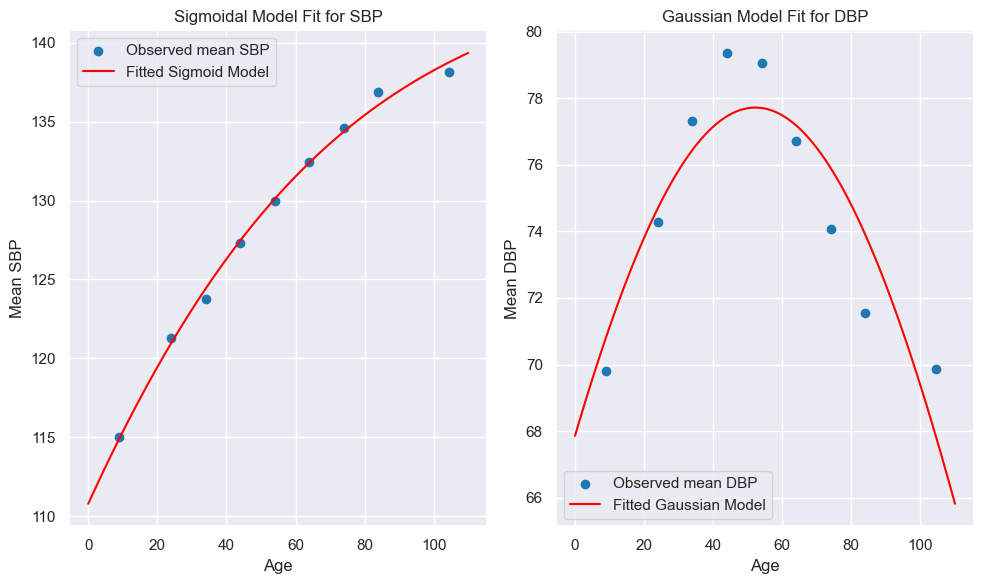

In [8]:
data = df.copy()
def sigmoid_model(a, Smax, k, a0):
    return Smax / (1 + np.exp(-k * (a - a0)))

def gaussian_model(a, Dmax, apeak, sigma):
    return Dmax * np.exp(-((a - apeak) ** 2) / (2 * sigma ** 2))

sigmoid_params, _ = curve_fit(sigmoid_model, data['Age'], data['mean SBP'], p0=[140, 0.1, 50])
Smax_est, k_est, a0_est = sigmoid_params

gaussian_params, _ = curve_fit(gaussian_model, data['Age'], data['mean DBP'], p0=[80, 50, 10])
Dmax_est, apeak_est, sigma_est = gaussian_params


print(f"Estimated Parameters for Sigmoidal Model (SBP):")
print(f"Smax (Maximum SBP) = {Smax_est:.2f}")
print(f"k (Growth Rate) = {k_est:.4f}")
print(f"a0 (Age at half-maximum SBP) = {a0_est:.2f}")

print(f"$nEstimated Parameters for Gaussian Model (DBP):")
print(f"Dmax (Maximum DBP) = {Dmax_est:.2f}")
print(f"apeak (Age of peak DBP) = {apeak_est:.2f}")
print(f"sigma (Spread of the Gaussian curve) = {sigma_est:.2f}")

ages = np.linspace(0, 110, 100)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['Age'], data['mean SBP'], label="Observed mean SBP")
plt.plot(ages, sigmoid_model(ages, *sigmoid_params), color='red', label="Fitted Sigmoid Model")
plt.xlabel('Age')
plt.ylabel('Mean SBP')
plt.title('Sigmoidal Model Fit for SBP')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(data['Age'], data['mean DBP'], label="Observed mean DBP")
plt.plot(ages, gaussian_model(ages, *gaussian_params), color='red', label="Fitted Gaussian Model")
plt.xlabel('Age')
plt.ylabel('Mean DBP')
plt.title('Gaussian Model Fit for DBP')
plt.legend()

plt.tight_layout()
plt.grid(True)
plt.show()


/Users/yasodasairamkandikonda/Desktop/Pytorch/env/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/yasodasairamkandikonda/Desktop/Pytorch/env/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


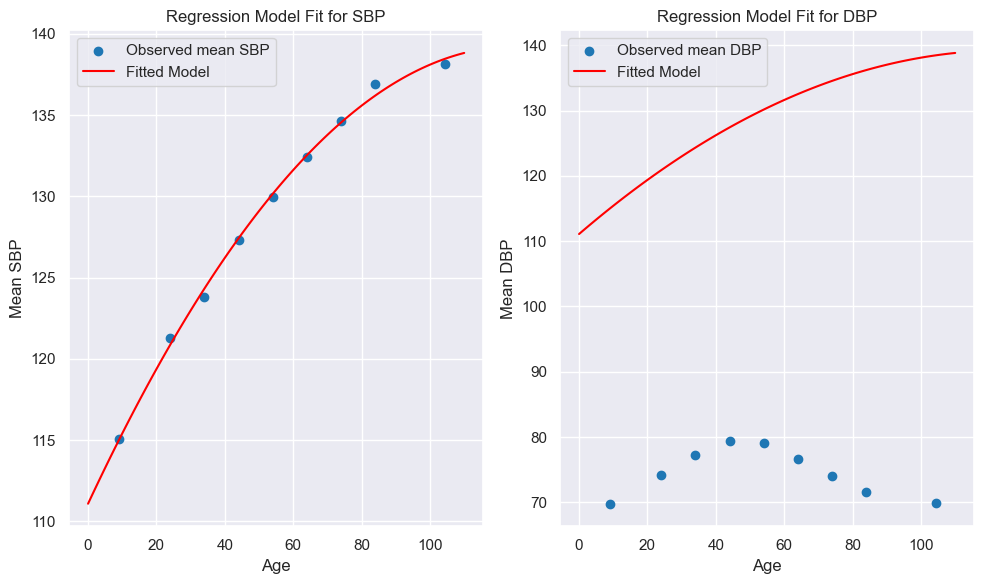

In [9]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(data['Age'], data['mean SBP'], label="Observed mean SBP")
plt.plot(ages, lr1.predict(np.vstack((ages, ages**2)).T), color='red', label="Fitted Model")
plt.xlabel('Age')
plt.ylabel('Mean SBP')
plt.title('Regression Model Fit for SBP')
plt.grid(True)
plt.legend()

# Plot DBP data and fit
plt.subplot(1, 2, 2)
plt.scatter(data['Age'], data['mean DBP'], label="Observed mean DBP")
plt.plot(ages, lr1.predict(np.vstack((ages, ages**2)).T), color='red', label="Fitted Model")
plt.xlabel('Age')
plt.ylabel('Mean DBP')
plt.title('Regression Model Fit for DBP')
plt.legend()

plt.tight_layout()
plt.grid(True)
plt.show()

In [10]:
print('R2_score of regression model for dbp', r2_score(data[['mean DBP']], lr.predict(model_df[['Age', 'Age_squared']])))
print('R2_score of gaussian model for dbp', r2_score(data[['mean DBP']], gaussian_model(model_df['Age'], *gaussian_params)))

R2_score of regression model for dbp 0.79898697807488
R2_score of gaussian model for dbp 0.8112476958123043


In [11]:
print('R2_score of regression model for SBP', r2_score(data[['mean SBP']], lr1.predict(model_df[['Age', 'Age_squared']])))
print('R2_score of sigmoid-gaussian model for SBP', r2_score(data[['mean SBP']], sigmoid_model(model_df['Age'], *sigmoid_params)))

R2_score of regression model for SBP 0.9976581658819437
R2_score of sigmoid-gaussian model for SBP 0.9963181195973422


### Bias removal

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, make_scorer, roc_auc_score, roc_curve, auc
from xgboost import XGBClassifier

In [13]:
mu_sbp_male = 133.0  
sigma_sbp_male = 18.6  
mu_dbp_male = 78.8  
sigma_dbp_male = 12.6  
rho_male = 0.45  

# Female statistics
mu_sbp_female = 125.8  
sigma_sbp_female = 19.0  
mu_dbp_female = 74.8  
sigma_dbp_female = 12.4  
rho_female = 0.5  
cov_male = np.array([
    [sigma_sbp_male ** 2, rho_male * sigma_sbp_male * sigma_dbp_male],
    [rho_male * sigma_sbp_male * sigma_dbp_male, sigma_dbp_male ** 2]
])

cov_female = np.array([
    [sigma_sbp_female ** 2, rho_female * sigma_sbp_female * sigma_dbp_female],
    [rho_female * sigma_sbp_female * sigma_dbp_female, sigma_dbp_female ** 2]
])


mean_male = np.array([mu_sbp_male, mu_dbp_male])
mean_female = np.array([mu_sbp_female, mu_dbp_female])
male_points = multivariate_normal.rvs(mean=mean_male, cov=cov_male, size=50000)
female_points = multivariate_normal.rvs(mean=mean_female, cov=cov_female, size=50000)
# df = np.vstack((male_points, female_points))
male_df = pd.DataFrame(male_points, columns=['sbp', 'dbp'])
male_df['sex'] = 1
female_df = pd.DataFrame(female_points, columns=['sbp', 'dbp'])
female_df['sex'] = 0
df = pd.concat([male_df, female_df], axis=0)
df_train, df_test = train_test_split(df, test_size=0.20)
x_train = df_train.drop('sex', axis=1)
x_test = df_test.drop('sex', axis=1)
y_train = df_train[['sex']]
y_test = df_test[['sex']]

In [14]:
def fit_classifier(x_train, y_train, x_test, y_test, wts=None):
    model = LogisticRegression(solver='liblinear', max_iter=500)
    param_grid = {
    'penalty': ['l1', 'l2'],          
}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
    if wts is not None:
        grid_search.fit(x_train, y_train, sample_weight=wts)
    else:
        grid_search.fit(x_train, y_train)
    preds = grid_search.predict_proba(x_test)[:, 1:]
    return preds

In [15]:
metrics_frame = pd.DataFrame()

In [16]:
for ratio in [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    df_male = df_train[df_train.sex == 1]
    df_female = df_train[df_train.sex == 0]
    if ratio != 1:
        df_female = df_female.sample(int(ratio*df_train.groupby('sex').count().loc[1]['sbp']))
    df = pd.concat([df_male, df_female], axis=0)
    x_train = df.drop('sex', axis=1)
    y_train = df.sex
    probs = fit_classifier(x_train, y_train, x_test, y_test)
    metrics_frame[ratio] = probs.flatten()

In [17]:
metrics_frame

,0.5,0.6,0.7,0.8,0.9,1.0
0,0.720551,0.680318,0.645803,0.613774,0.585228,0.561592
1,0.682639,0.642829,0.605721,0.574790,0.545313,0.520720
2,0.697400,0.656832,0.620937,0.589054,0.559952,0.535694
3,0.775127,0.741772,0.708826,0.682166,0.655166,0.633671
4,0.681288,0.637661,0.602453,0.568071,0.539043,0.514482
...,...,...,...,...,...,...
19995,0.607279,0.562517,0.525718,0.491492,0.462338,0.437069
19996,0.628790,0.587055,0.548998,0.517120,0.487465,0.462190
19997,0.640175,0.595946,0.559469,0.525245,0.495935,0.470816
19998,0.523880,0.478079,0.442744,0.408555,0.381076,0.356477


In [18]:
def youdens_cutoff(y_true, y_prob, thresh):
    youdens_index = tpr - fpr
    best_index = np.argmax(youdens_index)
    best_threshold = thresh[best_index]
    return best_threshold


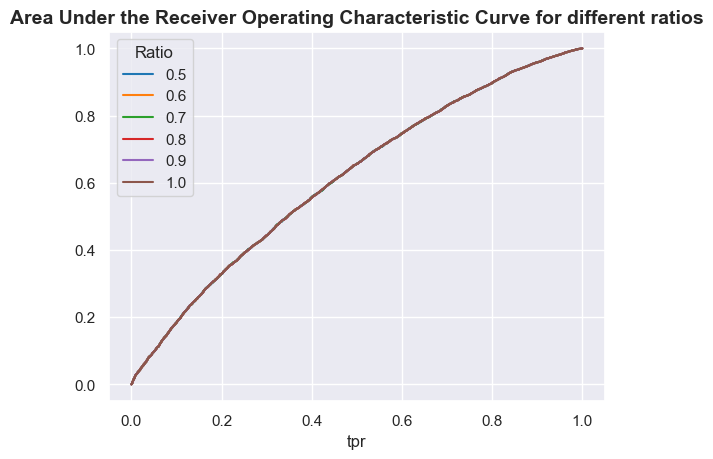

In [19]:
accs = []
f1_scores = []
for series_name, series in metrics_frame.items():
    fpr, tpr, thresh = roc_curve(y_test, series)
    # thresh = youdens_cutoff(fpr, tpr, thresh)
    preds = np.where(series >= 0.5, 1, 0)
    accs.append(accuracy_score(y_test, preds))
    f1_scores.append(f1_score(y_test, preds))
    plt.plot(fpr, tpr, label=series_name)
plt.legend(title='Ratio')
plt.xlabel('fpr', fontsize=12)
plt.xlabel('tpr', fontsize=12)
plt.title('Area Under the Receiver Operating Characteristic Curve for different ratios', fontweight='bold', fontsize=14)
plt.grid()
plt.show()

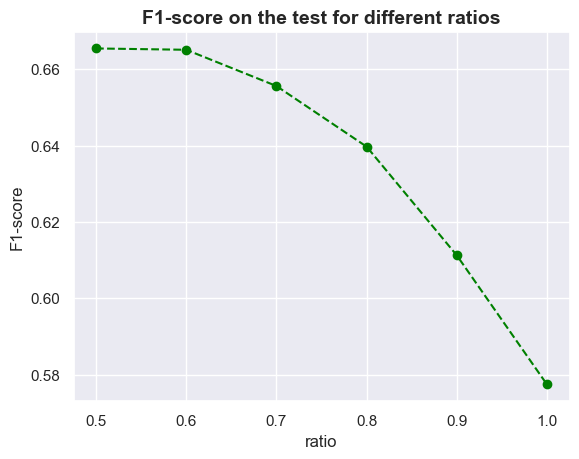

In [20]:
# plt.figure(dpi=300)
plt.plot([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], f1_scores, color='green', linestyle='--', marker='o')
plt.xlabel('ratio', fontsize=12)
plt.ylabel('F1-score', fontsize=12)
plt.title('F1-score on the test for different ratios', fontweight='bold', fontsize=14)
plt.grid()
plt.show()

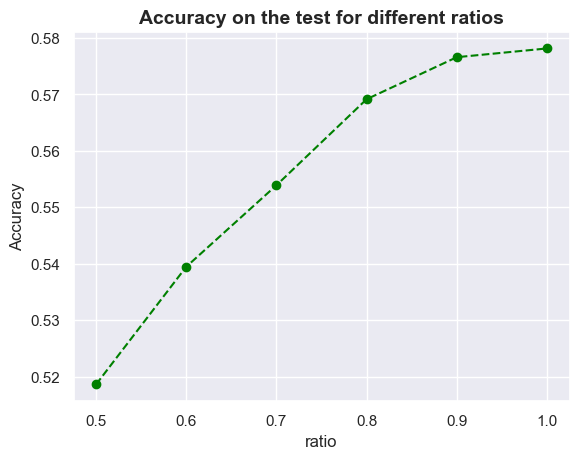

In [21]:
# plt.figure(dpi=300)
ratios = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.plot([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], accs, color='green', linestyle='--', marker='o')
plt.xlabel('ratio', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy on the test for different ratios', fontweight='bold', fontsize=14)
plt.grid()
plt.show()

In [22]:
male_accs = []
male_f1s = []
female_accs = []
female_f1s = []
for series_name, series in metrics_frame.items():
    male_mask = y_test.sex.to_numpy() == 1
    female_mask = y_test.sex.to_numpy() == 0
    male_scores = series[male_mask]
    male_truths = y_test[male_mask]
    female_scores = series[female_mask]
    female_truths = y_test[female_mask]
    male_preds = male_scores.copy()
    female_preds = female_scores.copy()
    male_preds = np.where(male_preds >= 0.5, 1, 0)
    female_preds = np.where(female_preds >= 0.5, 1, 0)
    male_acc = accuracy_score(male_truths, male_preds)
    female_acc = accuracy_score(female_truths, female_preds)
    male_f1 = f1_score(male_truths, male_preds)
    female_f1 = f1_score(female_truths, female_preds)
    male_accs.append(male_acc)
    male_f1s.append(male_f1)
    female_accs.append(female_acc)
    female_f1s.append(female_f1)

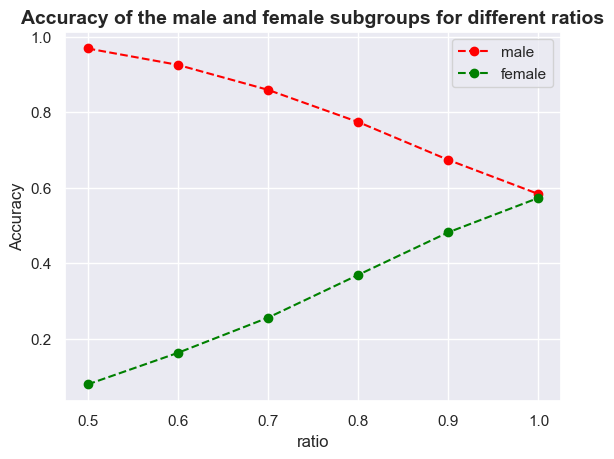

In [23]:
plt.plot(ratios, male_accs, color='red', linestyle='--', marker='o', label='male')
plt.plot(ratios, female_accs, color='green', linestyle='--', marker='o', label='female')
plt.xlabel('ratio', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy of the male and female subgroups for different ratios', fontweight='bold', fontsize=14)
plt.legend()
plt.grid()
plt.show()

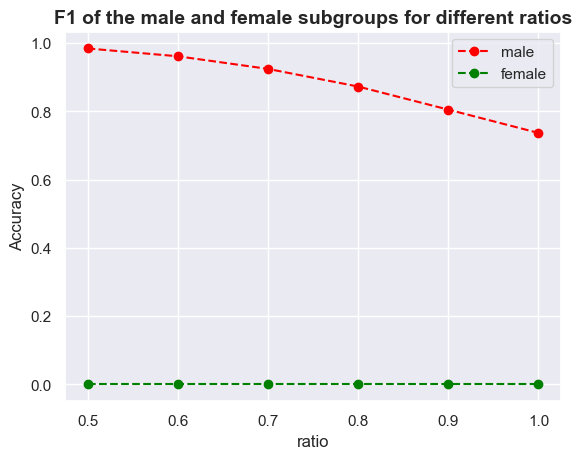

In [24]:
plt.plot(ratios, male_f1s, color='red', linestyle='--', marker='o', label='male')
plt.plot(ratios, female_f1s, color='green', linestyle='--', marker='o', label='female')
plt.xlabel('ratio', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('F1 of the male and female subgroups for different ratios', fontweight='bold', fontsize=14)
plt.grid()
plt.legend()
plt.show()

### Reweighting samples

In [25]:
from sklearn.utils.class_weight import compute_class_weight

In [26]:
balanced_metrics_frame = pd.DataFrame()

In [27]:
for ratio in [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    df_male = df_train[df_train.sex == 1]
    df_female = df_train[df_train.sex == 0]
    if ratio != 1:
        df_female = df_female.sample(int(ratio*df_train.groupby('sex').count().loc[1]['sbp']))
    df = pd.concat([df_male, df_female], axis=0)
    x_train = df.drop('sex', axis=1)
    y_train = df.sex
    sample_weight = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
    sample_weights = np.where(y_train == 0, sample_weight[0], sample_weight[1])
    probs = fit_classifier(x_train, y_train, x_test, y_test, wts=sample_weights)
    balanced_metrics_frame[ratio] = probs.flatten()

In [28]:
balanced_male_accs = []
balanced_male_f1s = []
balanced_female_accs = []
balanced_female_f1s = []
for series_name, series in balanced_metrics_frame.items():
    male_mask = y_test.sex.to_numpy() == 1
    female_mask = y_test.sex.to_numpy() == 0
    male_scores = series[male_mask]
    male_truths = y_test[male_mask]
    female_scores = series[female_mask]
    female_truths = y_test[female_mask]
    male_preds = male_scores.copy()
    female_preds = female_scores.copy()
    male_preds = np.where(male_preds >= 0.5, 1, 0)
    female_preds = np.where(female_preds >= 0.5, 1, 0)
    male_acc = accuracy_score(male_truths, male_preds)
    female_acc = accuracy_score(female_truths, female_preds)
    male_f1 = f1_score(male_truths, male_preds)
    female_f1 = f1_score(female_truths, female_preds)
    balanced_male_accs.append(male_acc)
    balanced_male_f1s.append(male_f1)
    balanced_female_accs.append(female_acc)
    balanced_female_f1s.append(female_f1)

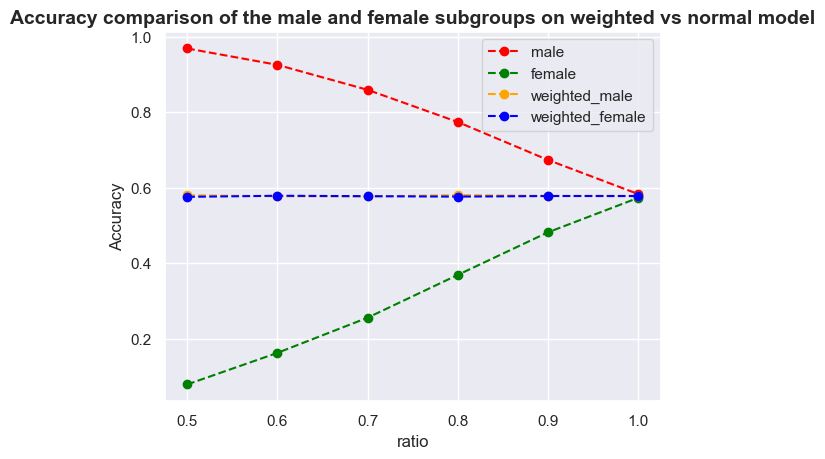

In [29]:
plt.plot(ratios, male_accs, color='red', linestyle='--', marker='o', label='male')
plt.plot(ratios, female_accs, color='green', linestyle='--', marker='o', label='female')
plt.plot(ratios, balanced_male_accs, color='orange', linestyle='--', marker='o', label='weighted_male')
plt.plot(ratios, balanced_female_accs, color='blue', linestyle='--', marker='o', label='weighted_female')
plt.xlabel('ratio', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy comparison of the male and female subgroups on weighted vs normal model', fontweight='bold', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Analysis

#### 1- iv

##### Interpretation of Polynomial Model Parameters: $( c_1 )$ and $( d_1 )$

In the polynomial models for **SBP** and **DBP**, $( c_1 $) and $( d_1 $) represent the coefficients for the quadratic (age$(^2$)) term, which primarily influences the **curvature** of each model. Here’s the interpretation based on the given equations and values:

##### Polynomial Model Equations
1. **SBP (Systolic Blood Pressure)**:
   $
   \text{SBP}(a) = c_1 a^2 + c_2 a + c_3 = -0.002 \cdot a^2 + 0.45 \cdot a + 111.092
   $
   - $( c_1 = -0.002 $): This term represents the curvature of the SBP trend as age increases. Since $( c_1 $) is negative, it introduces a **concave-down shape** to the SBP curve, indicating that the rate of increase in SBP decreases over time. Physiologically, this aligns with a slowing in the growth rate of SBP with advancing age.

2. **DBP (Diastolic Blood Pressure)**:
   $
   \text{DBP}(a) = d_1 a^2 + d_2 a + d_3 = -0.004 \cdot a^2 + 0.377 \cdot a + 67.711
   $
   - $( d_1 = -0.004 $): Similar to $( c_1 $), $( d_1 $) influences the curvature of the DBP trend. Its negative value implies a **concave-down shape** in the DBP curve, reflecting a peak followed by a gradual decline in DBP with age.

##### Physical Dimension of Each Parameter
Since age $( a $) is measured in years:
- $( c_1 $) (for SBP) and $( d_1 $) (for DBP) are coefficients for the age$(^2$) term. Therefore, their dimensions are **mmHg per year$(^2$)**, reflecting how blood pressure changes in response to the square of age.

In summary:
- **$( c_1 = -0.002 $, ${mmHg/year}^2$)** for SBP: Adds a concave-down shape to the SBP curve, showing a slowing increase.
- **$( d_1 = -0.004 $, ${mmHg/year}^2$)** for DBP: Adds a concave-down shape to the DBP curve, reflecting a peak and subsequent decline in DBP with age.



### 1 - v - i
The polynomial regression model has a slightly higher R2 score (0.9977) for SBP compared to the sigmoid model (0.9963). This suggests that polynomial regression fits the SBP data marginally better in terms of explained variance. However, the difference is minimal, and the sigmoid model still captures the expected physiological trend, as it inherently models the asymptotic behavior of SBP as age increases. For DBP, the Gaussian model has a higher 
𝑅2 score (0.8112) than the polynomial regression model (0.799), indicating that it better captures the peak and decline of DBP with age.

Thus:

<strong>SBP</strong>: Polynomial regression model performs slightly better in terms of R2 Score but may not capture physiological trends as intuitively as the sigmoid model. <br>
<strong>DBP</strong>: The Gaussian model better captures the natural aging trend of DBP, where DBP rises to a peak and then declines.

### 1- iv and 1 - v - ii
<strong>Sigmoid Model Parameters for SBP</strong>: <br>
Smax = 145.12: Represents the asymptotic maximum SBP, which aligns with physiological limits on systolic blood pressure. <br>
a0 = − 64.11: A negative age at half-maximum indicates that the age range for the SBP curve might be offset. This could be due to model fitting challenges or data constraints, but it still provides a useful approximation. <br>
<strong>Gaussian Model Parameters for DBP</strong>: <br>
Dmax = 77.72: Maximum DBP, showing a peak value around middle age. <br>
apeak = 52.21 Indicates that DBP peaks around age 52, aligning with physiological trends where DBP increases until middle age and then gradually declines. <br>
σ=100.24: A wide spread parameter, reflecting gradual changes in DBP. <br>

### 1 - v - iii 
##### Limitations
Sigmoid and Gaussian Models: While these models capture general trends in blood pressure changes with age, they do not account for demographic or lifestyle factors such as sex, ethnicity, diet, and physical activity, which can significantly influence blood pressure trends.

Polynomial Regression: Although it fits the data well, the polynomial model is prone to overfitting and lacks interpretability, especially outside the observed age range. It does not inherently model the physiological saturation (in SBP) or peak-and-decline behavior (in DBP) seen in actual blood pressure trends.

Data Limitations: If the dataset does not have a balanced distribution of age, outliers, or if it lacks subgroup data (e.g., age-sex interactions), these models might oversimplify or misrepresent certain population segments.

#### Analysis of Classifier Performance with Different Male/Female Data Ratios

###### 1. Classifier Performance Trends
- **Accuracy**: 
  - As seen in the first plot, the classifier's accuracy increases as the male-to-female ratio rises from 0.5 to 0.8, peaking around a ratio of 0.8–0.9, and then stabilizes. This indicates that the classifier performs better when there is a higher proportion of males relative to females in the dataset.
- **F1-Score**: 
  - The second plot presents a different trend, with the F1-score being highest at a 0.5–0.6 ratio, suggesting balanced precision and recall. As the ratio increases further, the F1-score declines, indicating that either precision, recall, or both deteriorate when the dataset becomes more male-dominant.
- **AUC-ROC**: 
  - The third plot reveals that the AUC remains relatively consistent across different ratios. This suggests that the classifier's overall ability to distinguish between classes does not vary significantly with the male-to-female ratio.

###### 2. Potential Biases Introduced by Varying Prevalences
- **Performance Bias**: 
  - The observed changes in performance metrics indicate that the classifier may be biased when trained on datasets with unbalanced gender ratios. Increasing the male prevalence appears to enhance accuracy but leads to a decline in the F1-score. This suggests that the classifier might favor the majority class, resulting in an imbalance between true positive and false positive rates.
- **Impact on Recall and Precision**: 
  - The decrease in F1-score indicates potential issues with either recall or precision. A higher prevalence of one gender can cause the classifier to be overly tuned to the majority class, reducing its effectiveness in identifying the minority class. This is particularly concerning in applications where balanced recall and precision are crucial.
- **Fairness Concerns**: 
  - The varying performance metrics highlight potential fairness issues. If the classifier is used in real-world applications, its decisions may be biased against one gender, depending on the training data distribution. Addressing this requires techniques like resampling, reweighting, or using fairness-aware algorithms to mitigate bias.

##### Conclusion
The analysis underscores the importance of using balanced datasets to prevent biases that can affect classifier performance and fairness. It is crucial to evaluate classifiers across multiple metrics, not just accuracy, to ensure robust and equitable outcomes.


##### Reflection on the Importance of Balanced Datasets in Healthcare

Balanced datasets are crucial in healthcare, as they directly impact the performance and fairness of machine learning models used for clinical decision-making. In healthcare applications, unbalanced datasets—especially those with gender disparities—can lead to models that are biased towards the majority class. This could have severe consequences, such as misdiagnoses, treatment disparities, or overlooking critical health conditions that may be more prevalent in the minority group. Therefore, ensuring that datasets are representative of diverse patient populations is essential for achieving equitable and effective healthcare outcomes.

##### 1. Implications and Challenges with Real-World Unbalanced Datasets
- **Implications**:
  - **Bias in Model Predictions**: When datasets are unbalanced (e.g., more data on male patients compared to female patients), models may be biased towards the majority class. This can result in poorer performance for the minority class, affecting the reliability of predictions for that group. In healthcare, this could mean underdiagnosis or inadequate treatment recommendations for underrepresented populations.
  - **Reduced Generalizability**: Models trained on unbalanced datasets may struggle to generalize well to real-world data, where the distribution may differ. For instance, if a model is primarily trained on data from male patients, it might perform inadequately when tested on a female population, leading to unreliable outcomes.
- **Challenges**:
  - **Data Collection Constraints**: Collecting a balanced dataset can be challenging in practice. Healthcare records often reflect societal biases, such as differences in how often men and women seek medical care or disparities in access to healthcare services.
  - **Class Imbalance Impact on Metrics**: Common evaluation metrics, like accuracy, may be misleading when applied to unbalanced datasets. Precision, recall, and F1-score become more relevant but may still pose challenges in interpretation and optimization.

##### 2. Strategies to Address Challenges in Practice
- **Data Augmentation and Resampling**:
  - **Oversampling the Minority Class**: Techniques such as SMOTE (Synthetic Minority Over-sampling Technique) can be used to create synthetic examples for the minority class, helping to balance the dataset. While this can mitigate bias, it may also lead to overfitting, especially if synthetic samples are not diverse enough.
  - **Undersampling the Majority Class**: This involves reducing the size of the majority class to balance the dataset. However, this may result in loss of valuable information, particularly in small datasets.
- **Cost-Sensitive Learning**:
  - Incorporate cost-sensitive algorithms that penalize misclassification of the minority class more heavily. This approach can make models more sensitive to minority class examples, ensuring better performance.
- **Algorithmic Adjustments**:
  - Use ensemble methods, like balanced random forests or boosting techniques, that are better equipped to handle class imbalance. These algorithms can help in providing more robust and generalized models.
- **Fairness-Aware Machine Learning**:
  - Apply fairness-aware algorithms designed to reduce bias. These algorithms adjust model training to ensure fair outcomes across different groups, thereby addressing issues related to unbalanced datasets.
- **Example from Class**:
  - As discussed in class, using data augmentation techniques effectively helped balance the dataset and improve model performance. The example showed that careful application of techniques like SMOTE or adjusting class weights led to better F1-scores and improved recall for the minority class. This demonstrated the importance of applying domain-specific strategies to achieve fairness and reliability in critical fields like healthcare.

##### Conclusion
Addressing data imbalance in healthcare is not only a technical challenge but also a moral imperative. Strategies like data augmentation, cost-sensitive learning, and fairness-aware models can be employed to create more equitable and effective healthcare solutions. Ongoing evaluation and refinement are needed to ensure that these models can perform well across diverse populations, ultimately promoting better health outcomes for all.


##### Reducing Sex Bias Using Balanced Reweighting Technique

##### Strategy: Balanced Reweighting
To address the issue of sex bias in our model, we implemented a **balanced reweighting technique**. This approach adjusts the training process by modifying the loss function to give equal importance to both male and female subgroups, regardless of their prevalence in the dataset. By reweighting, we aim to balance the model's performance across different gender groups and minimize bias.

##### Reasoning Behind the Chosen Method
- **Fairness Improvement**: The balanced reweighting technique ensures that the model does not favor one gender over the other. In the original model, the performance was disproportionately affected by the gender ratio, with male and female accuracies diverging significantly as the ratio changed.
- **Stability in Performance**: As shown in the results, the reweighted model (blue and orange lines) achieved more consistent accuracy across different gender ratios compared to the unweighted model (red and green lines). This indicates a reduction in bias and improved reliability.
- **Handling Imbalance**: By reweighting the loss function, the model learns to treat instances from both subgroups with equal priority, even if one gender is underrepresented. This is particularly useful in real-world scenarios where data collection can be uneven.

##### Results and Interpretation
- **Reduced Disparity**: The plot demonstrates that the balanced reweighting technique successfully reduced the accuracy gap between male and female subgroups. Both genders achieved nearly equal performance, indicating a fairer model.
- **Consistent Accuracy**: The weighted model maintained stable accuracy across different ratios, suggesting that the reweighting method effectively mitigated the impact of varying male-to-female distributions.

##### Conclusion
The balanced reweighting technique proved effective in reducing sex bias by ensuring equal importance for both genders during training. This strategy can be extended to other types of biases, promoting fairness and robustness in machine learning models.


### References
https://arxiv.org/pdf/2306.08451 <br>
https://arxiv.org/pdf/2402.01598<br>
https://linkinghub.elsevier.com/retrieve/pii/S0022073622000942 <br>
ChatGPT: <a href="https://chat.openai.com/">Large Language model</a>
prompt: 
- Explain gaussian and sigmoid with a gaussian model
- How to develop the models above in python for dataset with two features.
- Help me interpret the paramters of Regression model,  gaussian model and Sigmoid gaussian model. The parameters I got are as follows:
      
    - Smax (Maximum SBP) = 145.12
    - a0 (Age at half-maximum SBP) = -64.11
    - Dmax (Maximum DBP) = 77.72
    - apeak (Age of peak DBP) = 52.21
    - sigma (Spread of the Gaussian curve) = 100.24
